In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
from keras.models import load_model

In [3]:
model=load_model('vgg.h5')

In [4]:
classes=["with_mask","without_mask"]

In [5]:
def detect_mask(img):
    img=cv2.resize(img,(224,224))
    img=img.reshape(1,224,224,3)
    #y_pred=model.predict_classes(img)
    y_pred=(model.predict(img) > 0.5).astype("int32")
    return y_pred[0][0]

1/1 [==============================] - 1s 681ms/step


Text(0.5, 0, 'with_mask')

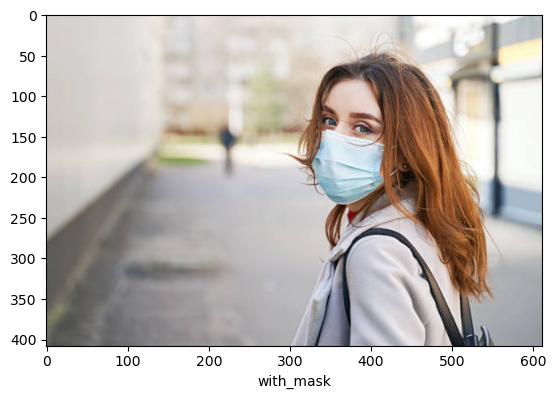

In [18]:
img1=cv2.imread("with_mask2.jpg")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.xlabel(classes[detect_mask(img1)])

1/1 [==============================] - 1s 532ms/step


Text(0.5, 0, 'with_mask')

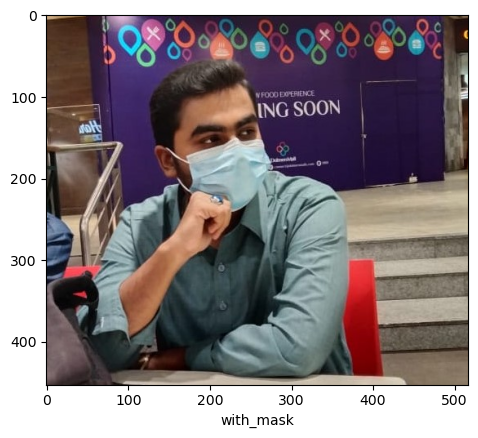

In [10]:
img1=cv2.imread("image1.jpg")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.xlabel(classes[detect_mask(img1)])

1/1 [==============================] - 1s 522ms/step


Text(0.5, 0, 'with_mask')

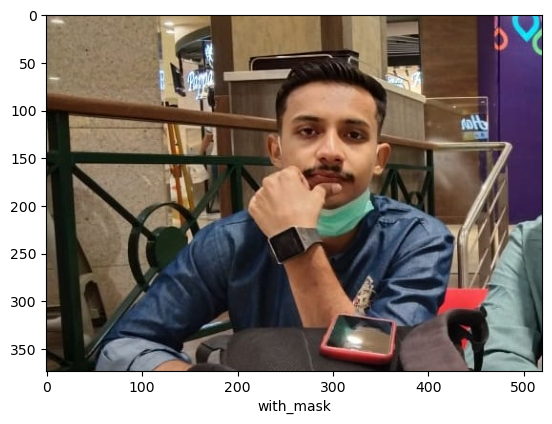

In [12]:
img1=cv2.imread("image2.jpg")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.xlabel(classes[detect_mask(img1)])

1/1 [==============================] - 1s 521ms/step


Text(0.5, 0, 'with_mask')

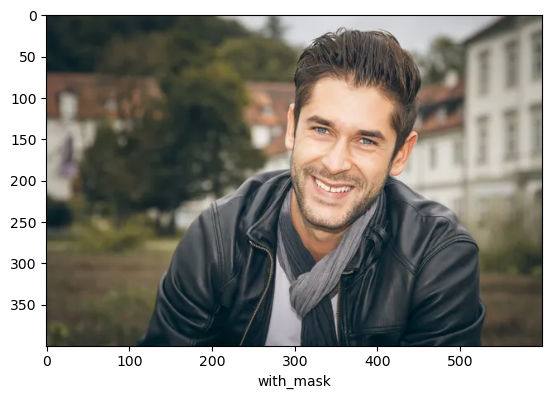

In [19]:
img1=cv2.imread("without.jpg")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.xlabel(classes[detect_mask(img1)])

1/1 [==============================] - 1s 540ms/step


Text(0.5, 0, 'without_mask')

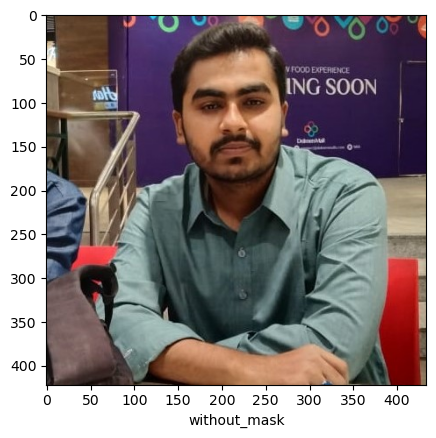

In [13]:
img1=cv2.imread("image3.jpg")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.xlabel(classes[detect_mask(img1)])

1/1 [==============================] - 1s 549ms/step


Text(0.5, 0, 'without_mask')

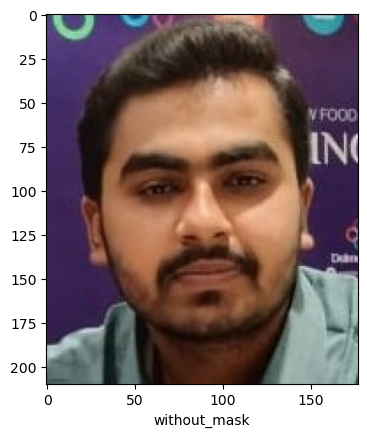

In [14]:
img1=cv2.imread("without_mask1.jpg")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.xlabel(classes[detect_mask(img1)])

1/1 [==============================] - 1s 526ms/step


Text(0.5, 0, 'without_mask')

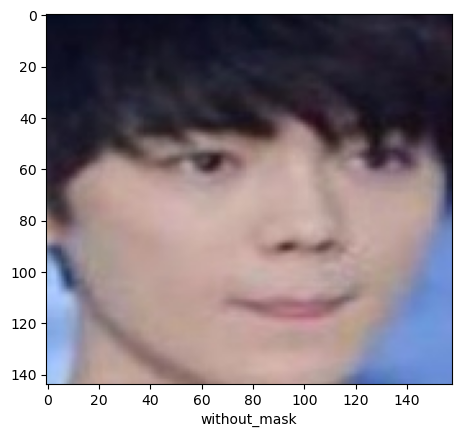

In [15]:
img1=cv2.imread("without_mask_36.jpg")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.xlabel(classes[detect_mask(img1)])

1/1 [==============================] - 1s 578ms/step


Text(0.5, 0, 'with_mask')

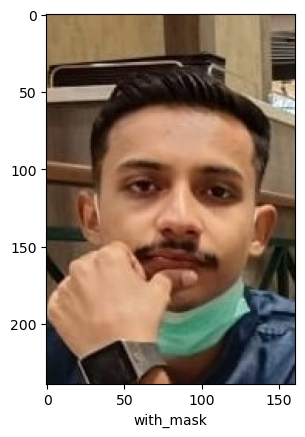

In [16]:
img1=cv2.imread("without_mas.jpg")
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.xlabel(classes[detect_mask(img1)])

In [6]:
def put_label(img,text,pos,bg_color):
    text_size=cv2.getTextSize(text,cv2.FONT_HERSHEY_SIMPLEX,0.4,cv2.FILLED) #1-SCALE, CV2.FILLED-THICKNESS
    end_x= pos[0] + text_size[0][0] + 2
    end_y = pos[1] + text_size[0][1] - 2
    
    cv2.rectangle(img,pos,(end_x,end_y),bg_color,cv2.FILLED)
    #cv2.putText(img,text,pos,cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,0),cv2.LINE_AA) #0,0,0 color
    cv2.putText(img, 
                text, 
                pos, 
                cv2.FONT_HERSHEY_SIMPLEX, 1, 
                (0, 255, 255), 
                2, 
                cv2.LINE_4)
    

In [2]:
cap=cv2.VideoCapture(0)

In [ ]:
while True:
    ret,frame=cap.read()
    label=detect_mask(frame)
    #print(label)
    if label == 0:
        put_label(frame,"Mask",(30,30),(255,0,0))
    else:
        put_label(frame,"No Mask",(30,30),(255,0,0))
    
    cv2.imshow("Live Video",frame)
    
    
    #Call detection Method
    if cv2.waitKey(1) & 0xFF ==ord('q'):
        break
cv2.destroyAllWindows()

1/1 [==============================] - 0s 487ms/step
